In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math

In [2]:
fly_selected_list = ['nsyb-G7f-rAch1h/20230417-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230428-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230507-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230515-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230429-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230506-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly4/data_motion',
                     'nsyb-G7f-r5HT1.0/20230517-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly3/data_motion',
                     'nsyb-G7f-r5HT1.0/20230603-nsyb-G7f-r5HT1.0/fly1/data_motion']

In [3]:
file_save_path = 'motion_analysis'
# motion data
motion_result_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new'
# neural data
neural_result_path = '../results'
# parameters
if_save = False
the_save_path = os.path.join(neural_result_path,file_save_path,'6_neural_pc_regression_variance')
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)
file_c1_name = 'regression_variance_explained_c1.npy'
file_c2_name = 'regression_variance_explained_c2.npy'
neural_dim_selected = range(15)
motion_dim_selected = 49
color_list = ['sienna','darkgrey','peru']
label_list = ['Both','Motion','Stimulus'] 

In [4]:
data_c1_ach = []
data_c2_ach = []
for i_fly in range(10):
    fly_selected = fly_selected_list[i_fly]
    # load data
    data_c1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,file_c1_name))
    data_c2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,file_c2_name))
    data_c1 = np.squeeze(data_c1[neural_dim_selected,motion_dim_selected,:])
    data_c2 = np.squeeze(data_c2[neural_dim_selected,motion_dim_selected,:])
    data_c1_ach.append(data_c1)
    data_c2_ach.append(data_c2)
print(np.shape(data_c1_ach))
print(np.shape(data_c2_ach))

(10, 15, 3)
(10, 15, 3)


In [5]:
data_c1_5ht = []
data_c2_5ht = []
for i_fly in range(10,len(fly_selected_list)):
    fly_selected = fly_selected_list[i_fly]
    # load data
    data_c1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,file_c1_name))
    data_c2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,file_c2_name))
    data_c1 = np.squeeze(data_c1[neural_dim_selected,motion_dim_selected,:])
    data_c2 = np.squeeze(data_c2[neural_dim_selected,motion_dim_selected,:])
    data_c1_5ht.append(data_c1)
    data_c2_5ht.append(data_c2)
print(np.shape(data_c1_5ht))
print(np.shape(data_c2_5ht))

(10, 15, 3)
(10, 15, 3)


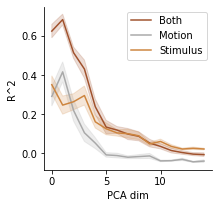

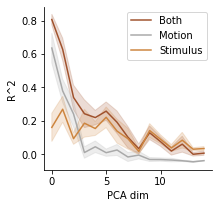

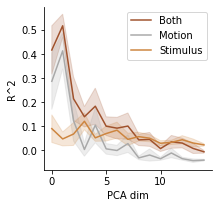

In [6]:
data_c1_5ht = np.array(data_c1_5ht)
data_c2_5ht = np.array(data_c2_5ht)
data_c1_ach = np.array(data_c1_ach)
data_c2_ach = np.array(data_c2_ach)
data_c1 = np.concatenate((data_c1_ach,data_c1_5ht),axis = 0)
for i in range(3):
    plt.figure(figsize = (3,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i == 0:
        data = data_c1
    elif i == 1:
        data = data_c2_ach
    else:
        data = data_c2_5ht
    # both
    a = np.mean(np.squeeze(data[:,:,0]),0)
    plt.plot(a,color = color_list[0],label = label_list[0])
    std_yy = np.std(np.squeeze(data[:,:,0]),0,ddof = 1)/math.sqrt(np.size(np.squeeze(data[:,:,0]),0))
    yy_below = a-std_yy
    yy_above = a+std_yy
    x_fill = np.concatenate((neural_dim_selected,neural_dim_selected[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = color_list[0],alpha=0.2)
    # motion
    a = np.mean(np.squeeze(data[:,:,1]),0)
    plt.plot(a,color = color_list[1],label = label_list[1])
    std_yy = np.std(np.squeeze(data[:,:,1]),0,ddof = 1)/math.sqrt(np.size(np.squeeze(data[:,:,1]),0))
    yy_below = a-std_yy
    yy_above = a+std_yy
    x_fill = np.concatenate((neural_dim_selected,neural_dim_selected[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = color_list[1],alpha=0.2)
    # stimulus
    a = np.mean(np.squeeze(data[:,:,2]),0)
    plt.plot(a,color = color_list[2],label = label_list[2])
    std_yy = np.std(np.squeeze(data[:,:,2]),0,ddof = 1)/math.sqrt(np.size(np.squeeze(data[:,:,2]),0))
    yy_below = a-std_yy
    yy_above = a+std_yy
    x_fill = np.concatenate((neural_dim_selected,neural_dim_selected[::-1]),axis = 0)
    y_fill = np.concatenate((yy_below,yy_above[::-1]),axis = 0)
    plt.fill(x_fill,y_fill,color = color_list[2],alpha=0.2)
    plt.legend()
    plt.xlabel('PCA dim')
    plt.ylabel('R^2')
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'r2'+'_channel'+str(i)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'r2'+'_channel'+str(i)+'.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()